In [81]:
import pandas as pd
import numpy as np
import sqlite3
import csv
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
con = sqlite3.connect("../db.sqlite3")
cur = con.cursor()
cur.execute(
    "SELECT "
    "restaurant_order.id AS order_id, "
    "restaurant_order.datetime, "
    "restaurant_orderitem.id AS orderitem_id, "
    "restaurant_orderitem.quantity, "
    "restaurant_orderitem.order_id, "
    "restaurant_orderitem.product_id, "
    "restaurant_product.id AS product_id, "
    "restaurant_product.price, "
    "restaurant_product.name "
    "FROM restaurant_order "
    "JOIN restaurant_orderitem "
    "ON restaurant_order.id = restaurant_orderitem.order_id "
    "JOIN restaurant_product "
    "ON restaurant_orderitem.product_id = restaurant_product.id"
)
rows = cur.fetchall()
header = [i[0] for i in cur.description]
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)

    writer.writerows(rows)

cur.close()
con.close()

In [11]:
df = pd.read_csv('data.csv')
df = pd.DataFrame(df).drop(["order_id.1", "product_id.1"], axis=1)
len(df)

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

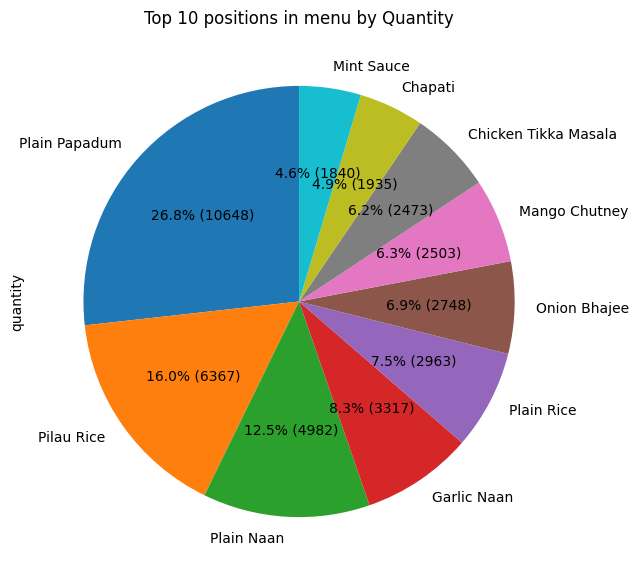

In [49]:
top_ten_products = df["quantity"].groupby(
    df["name"]
).sum().sort_values(ascending=False).head(10)

def custom_labels(pct, all_values):
    absolute = int(pct/100.*np.sum(all_values))
    return "{:.1f}% ({:d})".format(pct, absolute)

pie = top_ten_products.plot(
    kind="pie",
    autopct=lambda pct: custom_labels(pct, top_ten_products.values),
    startangle=90,
    figsize=(7, 7)
).set_title("Top 10 positions in menu by Quantity")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

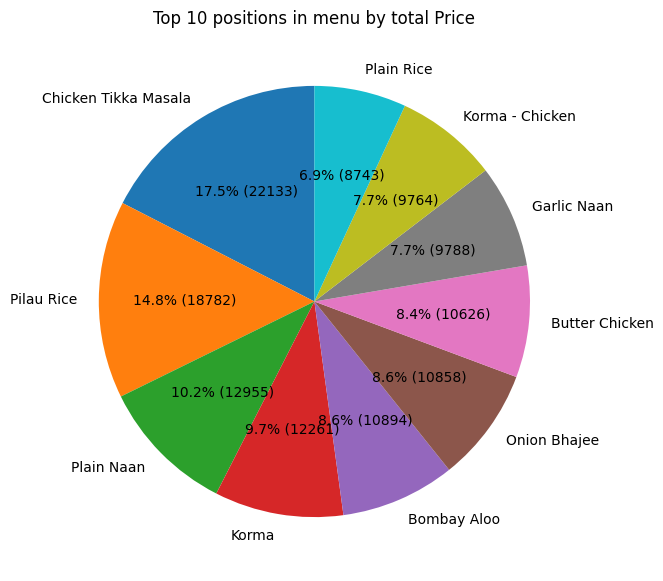

In [61]:
top_ten_by_price = (df["price"] * df["quantity"]).groupby(df["name"]).sum().sort_values(ascending=False).head(10)

pie_price = top_ten_by_price.plot(
    kind="pie",
    autopct=lambda pct: custom_labels(pct, top_ten_by_price.values),
    startangle=90,
    figsize=(7, 7)
).set_title("Top 10 positions in menu by total Price")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

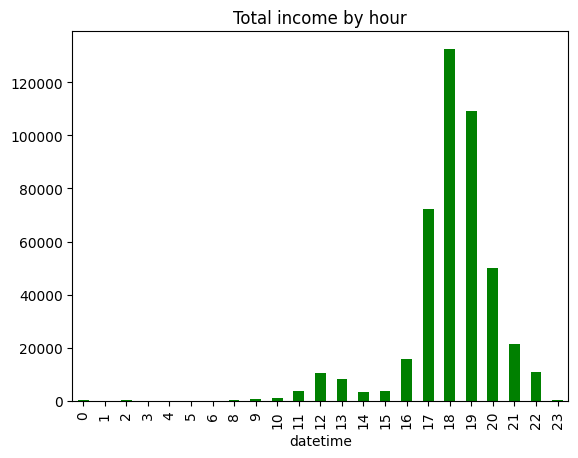

In [68]:
hours_to_income = (df["price"] * df["quantity"]).groupby(pd.to_datetime(df["datetime"]).dt.hour).sum()
bars_hours = hours_to_income.plot(
    x="hours", y="income", kind="bar", color="green"
).set_title("Total income by hour")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

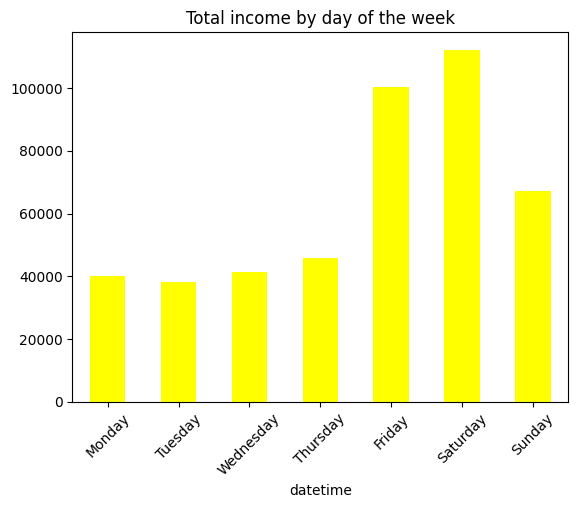

In [91]:
day_of_week_to_income = (df["price"] * df["quantity"]).groupby(pd.to_datetime(df["datetime"]).dt.dayofweek).sum()

day_names = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}
day_of_week_to_income.index = day_of_week_to_income.index.map(day_names)

bars_days = day_of_week_to_income.plot(
    x="day_of_week", y="income", kind="bar", color="yellow"
).set_title("Total income by day of the week")
plt.xticks(rotation=45)
plt.show()